# Implementación de N-gramas con abstracs que están lemmatizados pero aún tiene stopwords

Archivo 'ngram_frecuencia_2.csv' generado con éxito.


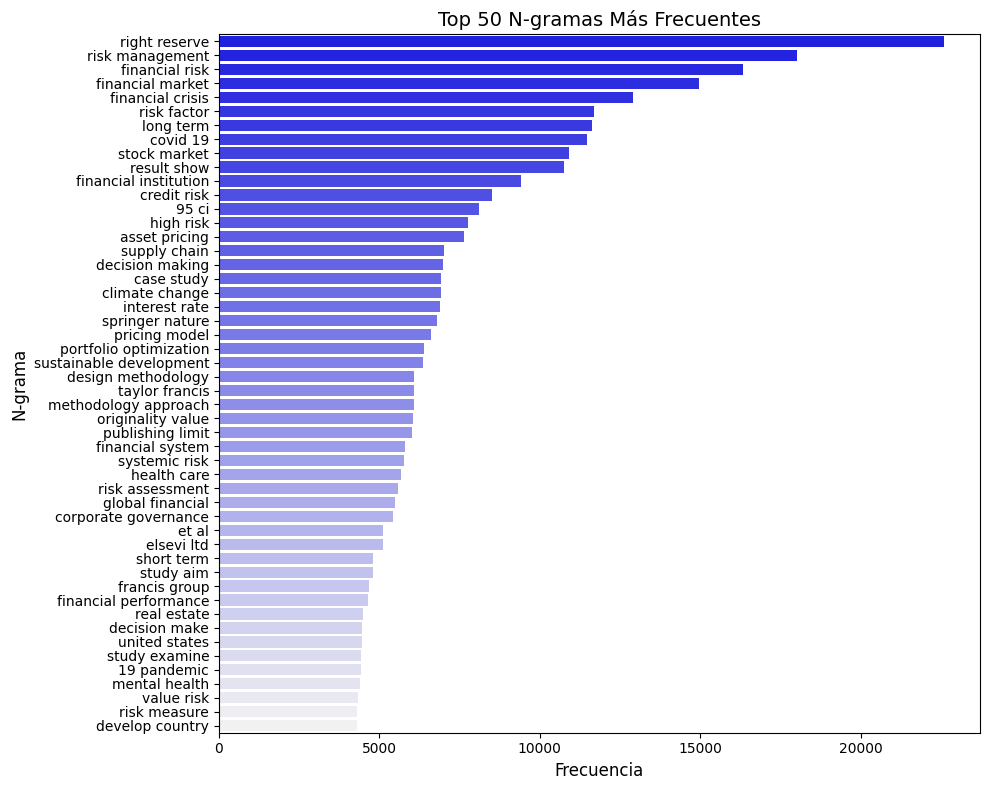

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Clase para analizar N-gramas
class NgramAnalyzer:
    def __init__(self, df):
        # Aceptar un DataFrame en lugar de una ruta de archivo para mayor flexibilidad
        self.df = df
        self.ngram_freq_df = None
    
    def generate_ngrams(self, n=2):
        """
        Genera N-gramas a partir de los documentos lemmatizados.
        :param n: Número de N-gramas (por ejemplo, 2 para bigramas, 3 para trigramas, etc.)
        """
        # Combinar todas las filas de lemas en una sola lista de documentos
        documents = self.df['Lemmas'].tolist()

        # Inicializar el CountVectorizer para contar la frecuencia de los N-gramas
        vectorizer = CountVectorizer(ngram_range=(n, n))  # Se generan N-gramas del tamaño especificado

        # Ajustar el vectorizador y transformar el corpus de lemas
        X = vectorizer.fit_transform(documents)

        # Obtener los N-gramas (vocabulario) y sus frecuencias
        ngrams = vectorizer.get_feature_names_out()
        frequencies = X.sum(axis=0).A1  # A1 para convertir a array unidimensional

        # Crear un DataFrame con los N-gramas y sus frecuencias
        self.ngram_freq_df = pd.DataFrame({'N-grama': ngrams, 'Frecuencia': frequencies})

        # Ordenar el DataFrame por la frecuencia en orden descendente
        self.ngram_freq_df = self.ngram_freq_df.sort_values(by='Frecuencia', ascending=False)

        # Guardar el DataFrame en un archivo CSV
        self.ngram_freq_df.to_csv(f'ngram_frecuencia_{n}.csv', index=False)

        print(f"Archivo 'ngram_frecuencia_{n}.csv' generado con éxito.")

    def plot_ngram_frequencies(self, top_n=50):
        """
        Grafica los N-gramas más frecuentes.
        :param top_n: Número de N-gramas a mostrar en el gráfico
        """
        # Seleccionar las top N palabras
        top_ngrams = self.ngram_freq_df.head(top_n)

        # Crear gráfico de barras con seaborn
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Frecuencia', y='N-grama', data=top_ngrams, palette='light:b_r')

        # Configurar el título y las etiquetas del gráfico
        plt.title(f'Top {top_n} N-gramas Más Frecuentes', fontsize=14)
        plt.xlabel('Frecuencia', fontsize=12)
        plt.ylabel('N-grama', fontsize=12)

        # Mostrar gráfico
        plt.tight_layout()
        plt.show()

# Cargar el archivo 'lemmatized_abstracts.csv'
df_lemmas = pd.read_csv('no_stopwords_abstracts.csv')

# Crear una instancia de la clase NgramAnalyzer
analyzer = NgramAnalyzer(df_lemmas)

# Generar N-gramas (por ejemplo, bigramas)
analyzer.generate_ngrams(n=2)

# Graficar los N-gramas más frecuentes
analyzer.plot_ngram_frequencies(top_n=50)


Archivo 'ngram_frecuencia_3.csv' generado con éxito.


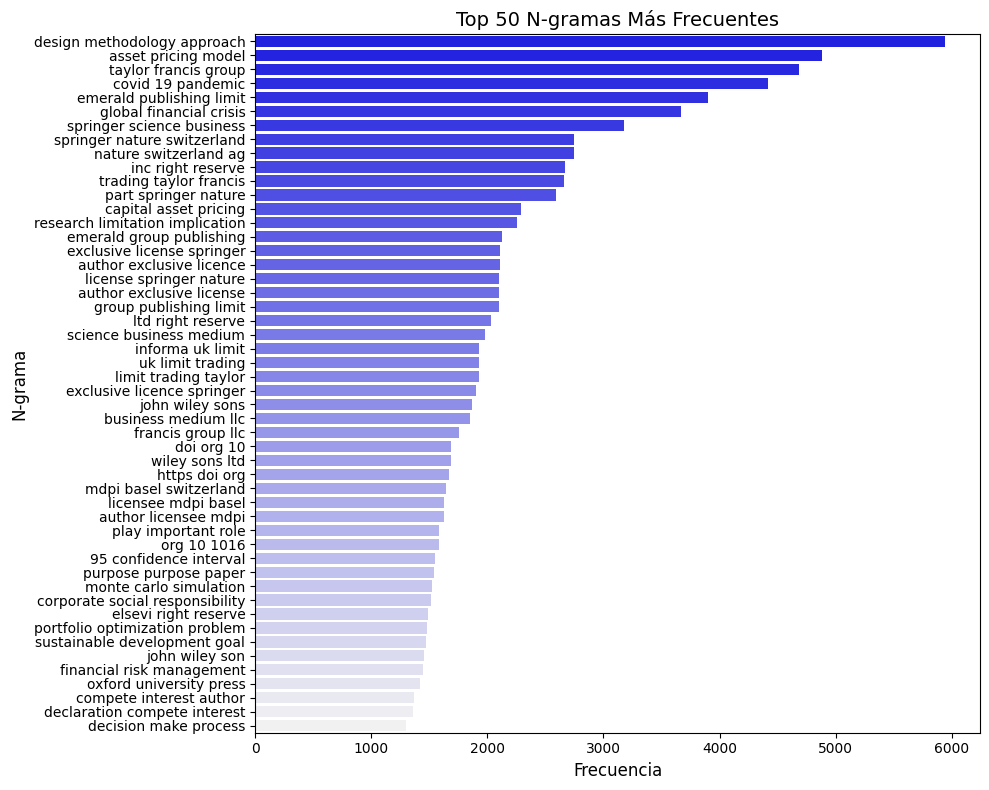

In [2]:
# Cargar el archivo 'lemmatized_abstracts.csv'
df_lemmas = pd.read_csv('no_stopwords_abstracts.csv')

# Crear una instancia de la clase NgramAnalyzer
analyzer = NgramAnalyzer(df_lemmas)

# Generar N-gramas (por ejemplo, bigramas)
analyzer.generate_ngrams(n=3)

# Graficar los N-gramas más frecuentes
analyzer.plot_ngram_frequencies(top_n=50)


Archivo 'ngram_frecuencia_4.csv' generado con éxito.


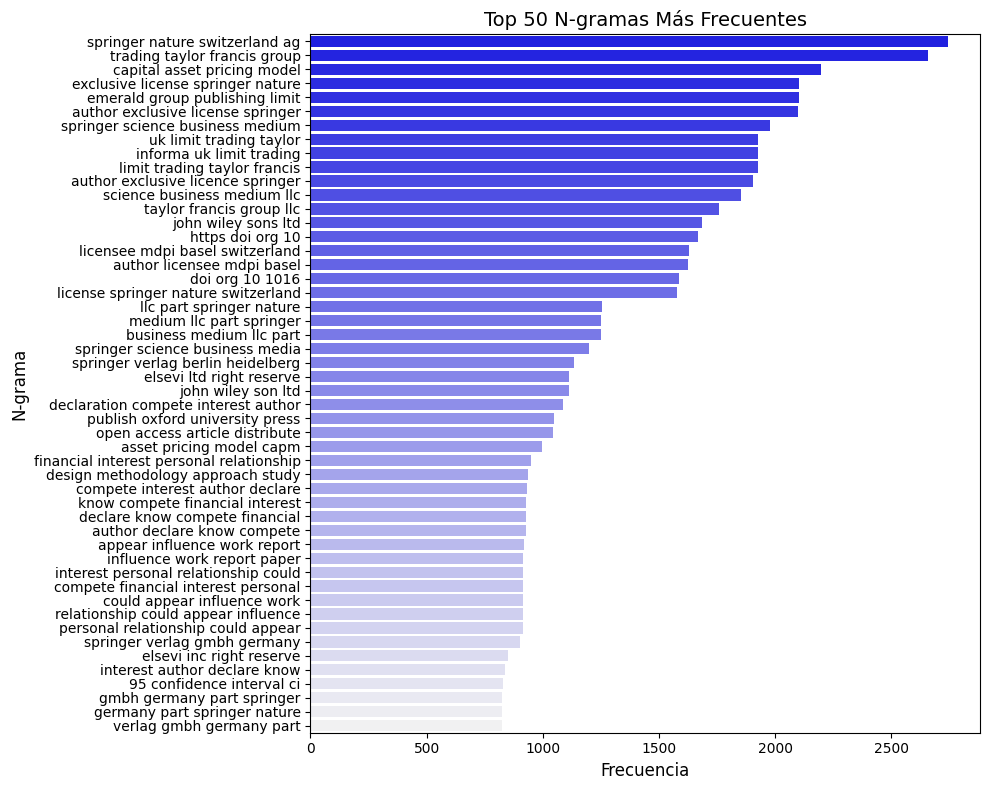

In [3]:
# Cargar el archivo 'lemmatized_abstracts.csv'
df_lemmas = pd.read_csv('no_stopwords_abstracts.csv')

# Crear una instancia de la clase NgramAnalyzer
analyzer = NgramAnalyzer(df_lemmas)

# Generar N-gramas (por ejemplo, bigramas)
analyzer.generate_ngrams(n=4)

# Graficar los N-gramas más frecuentes
analyzer.plot_ngram_frequencies(top_n=50)